# Assignment #4 - Reinforcement Learning

### <font color="red"> DUE: Nov 26 (Tuesday) 11:00 pm </font>  

<font color="blue"> Vaidehi Sonar </font>

# I. Overview

The objective of this assignment is implement Reinforcement Learning for Rummy game. We have to understand Rummy Environment and train our RL Agent using SARSA or Q-Learning. In this assignment,we selected the model for the problem, experimented with the selected model with various parameters(γ, α, and ϵ). Then we described the choice of selected parameters. Parameters that gave optimal results are selected and used for final training. Results for the outputs are visualized and outputs are explained.

# II. Problems 



## Rummy (Our Way)
![](https://upload.wikimedia.org/wikipedia/commons/9/9a/3_playing_cards.jpg)



### Description:
Rummy is mostly played by 4 players where each player get 10 cards and rest of placed as closed deck.  

But for this assignment to keep it simple, we have changed some rules, reduced the deck of cards and distribution of the cards among each player. Otherwise, the our Q table would be large to handle on our local machines.  

So in this game each player will get 3 cards randomly from 'A' to '5'. With each turn you have to pick a card either from the pile of closed or open cards depending on the cards you have. After that you have to select a card to drop to the pile from your deck. Your goal is to make all of your 3 cards of same number. As soon as one player reaches the goal state, it will meld the cards and game will stop and all other player will get score as the sum of their cards in hand. Player with minimum score will win the game.  

Each player will play for the 10 rounds and if nobody reach to the meld stage then each will player will get score equivalent to the sum of their cards in hand.

Player with the lowest score wins the game.



### <font color="red"> Game Introduction and Rules: </font>

You can only till max turns which is now 20. If you are able to meld your cards, you win otherwise you lose points as per your stash score.

Lets Simulate a Game Round :
The Goal of this game is to collect cards with the same rank.
Naming Conventions to follow H : Hearts, S : Spades, D : Diamonds, C : Clubs. Stash/Hand are the cards which you have. Stash/Hand Score: The sum of the rank of cards. 

- On the first turn you will be given 3 cards from the randomly shuffled deck. Eg: 3H, 2S, AD. Stash Score: 6
- In the next step you will have to either pick a card from pile or the deck. On the first turn, the top card of the deck is on the pile. The card on the pile is visible to you. So Card on the Pile : 2D . You have to decide whether you have to pick this card or you have to pick from pile. Since you alread
- Following the pickup step, you will have to drop one card from the stash/hand. Your Hand : 3H, 2S, AD, 2D
- You can drop any of these cards, but remember if you drop 2S or 2D you might not be able to make a series. So you have to decide whether to drop 3H or AD. Since there are maximum 20 turns, you have to keep your score low as well, Higher the score the higher points you lose. So you decide to drop 3H. Your hand/stash will be: 2S, 2D, AD
- Your opponent will play his hand, he/she shall pick up a card from a pile or deck and the drop a card to the pile.
- Now its your turn. The card on the Pile : 5H. Since picking up this card won't help you much. You decide to pick a card from the Deck. You get lucky, you get a 2C card. Your hand now is 2S, 2D, 2C, AD. Hurray! You can now meld these cards and drop the last card to make your score 0.
- You win this round. Your opponent Stash/Hand score : 15. So you are at 0 points and your opponent is at 15 points. You are ahead of him since you have to keep your score as low as possible.


## Rummy Environment

Importing Libraries

In [33]:
import random 
from functools import reduce
from collections import defaultdict
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Here, we define the SUITS, RANKS of the cards and their RANK_VALUE.

In [34]:
SUIT = ['H','S','D','C']
RANK = ['A', '2', '3', '4', '5','6','7']
RANK_VALUE = {'A': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'T': 10, 'Q': 10, 'K': 10}

## Card Class Definition
__init__  : Defines the card details such as rank, suit and calculates the rank value


In [35]:
class Card :
    def __init__(self,rank,suit):
        self.rank = rank
        self.suit = suit
        self.rank_to_val = RANK_VALUE[self.rank]
    
    def __str__(self):
        return f'{self.rank}{self.suit}'

    def __repr__(self):
        return f'{self.rank}{self.suit}'

    
    def __eq__(self,other):
        return self.rank == other.rank and self.suit == other.suit
    
# Deck class contains some basic operations performed with the cards:
# 1. Shuffling the cards.
# 2. Drawing card from the deck.

## Deck Class Definition
__shuffle__ : Shuffles the deck in random order

__draw_card__ : Draws a card from the top of the deck

In [36]:
class Deck:
    def __init__(self,packs):
        self.packs = packs
        self.cards = []
        for pack in range(0,packs) :
            for suit in SUIT :
                for rank in RANK :
                    self.cards.append(Card(rank,suit))
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        card = self.cards[0]
        self.cards.pop(0)
        return card

## Player Class:

### 1.__init__(self,name,stash=list(),isBot=False): 
Initializing stash, name, isBot/dealer points for each player.

### 2. deal_card(self,card):
This method appends the card in the stash and check the condition that length of stash should not be greater than nuber of cards length in game.

### 3. drop_card(self,card):
This method removes the card from stash and add that card into pile.

### 4. meld(self):
This method tries to find the cards with the same rank in the hand. If it finds then it will merge the cards in the hand to the melded cards array in the game. 

### 5. stash_score(self):
This method calculates sum of all the cards in stash according to the rank of each card.

### 6. get_info(self,debug):
This function fetch all the information of the player.

In [37]:
class Player:
  
    """  
        Player class to create a player object.
        eg: player = Player("player1", list(), isBot = False)
        Above declaration will be for your agent.
        All the player names should be unique or else you will get error.
        
    """

    def __init__(self,name,stash=list(),isBot=False,points=0,conn=None):
        self.stash = stash
        self.name = name
        self.game = None
        self.isBot = isBot
        self.points = points
        self.conn = conn
        
    def deal_card(self,card):
        try :
            self.stash.append(card)
            if len(stash) > self.game.cardsLength + 1 :
                raise ValueError('Cannot have cards greater than ')
        except ValueError as err:
            print(err.args)
            
    def drop_card(self,card):
        self.stash.remove(card)
        self.game.add_pile(card)
        return -1

    
    def meld(self):
        card_hash = defaultdict(list)
        for card in self.stash:
            card_hash[card.rank].append(card)
        melded_card_ranks = []
        for (card_rank,meld_cards) in card_hash.items():
            if len(meld_cards) >= 3 :
                self.game.meld.append(meld_cards)
                melded_card_ranks.append(card_rank)
                for card in meld_cards:
                    self.stash.remove(card)
        
        for card_rank in melded_card_ranks :
            card_hash.pop(card_rank)
        return len(melded_card_ranks) > 0

    def stash_score(self) :
        score = 0
        for card in self.stash :
            score += RANK_VALUE[card.rank]
        return score
    
    def get_info(self,debug):
        if debug :
            print(f'Player Name : {self.name} \n Stash Score: {self.stash_score()} \n Stash : {", ".join(str(x) for x in self.stash)}')
        card_ranks = []
        card_suits = []
        pileset = None
        pile = None
        for card in self.stash :
            card_suits.append(RANK_VALUE[card.rank])
            card_ranks.append(card.suit)
        if len(self.game.pile) > 0 : 
            return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks, "PileRank": self.game.pile[-1].rank, "PileSuit":self.game.pile[-1].suit}
        return {"Stash Score" : self.stash_score(), "CardSuit":  card_suits, "CardRanks": card_ranks}


## Game Enviroment:

### 1. __init():  

### 2. add_pile(self, card):  This method takes a card as argument and first checks number of cards in the deck. If its is ‘0’ then add the cards from file to deck and append the passed card to the pile.

### 3. pick_card(self, player, action):  This methods helps player picking up the card from either Pile or Deck based on action.
			We have defined, If action = 0 then, player will pick a card from Pile
			And if action. = 1 then player will pick card from Deck. 
			Meld condition will be check after player picks the card, if the meld condition satisfied, player won. 
            You can modify the rewards in return, only the values

### 4. pick_from_pile(self, player): This method helps player picking card from the pile and simultaneously a card from pile gets reduced.

### 5. pick_from_deck(self, player): This method is similar to above method but it helps picking up card from the Deck. 

### 6. get_player(self, player_name): This function fetch the details of the player given player_name.

### 7. computer_play(self, player): This method defines the play of the computer/Dealer in following sequence:
			--> Randomly taking actions from picking up card from deck/pile.
			--> Checking the meld condition afterwards.
			--> If the meld condition does not satisfied, remove the card from his stash.

### 8. play(self): This method defines all the function city of play for the player:
		  --> Decrementing the maximum number of turns defined per game.
		  --> For each player, it will check the 'stash', if the 'Stash' for any player = 0 (That player won), it will add the value of each card in stash for all other players.
		  --> Or If maximum number of turns in each round becomes 0, it will add the card values in stash for all the players and return.
      
### 9. drop_card(self,player,card) This method drops a card from the player given player object and card object and returns the reward associated with it.

      --> You can modify the rewards which gets returned in the value.


### 9. reset(self, players): This method will reinitialize all the deck, pile and players.

### 10. _update_turn(self): This method is used to count the number of turns in the game.

In [38]:
class RummyAgent() :
    """
    Simple Rummy Environment
    
    Simple Rummy is a game where you need to make all the cards in your hand same before your opponent does.
    Here you are given 3 cards in your hand/stash to play.
    For the first move you have to pick a card from the deck or from the pile. 
    The card in deck would be random but you can see the card from the pile.
    In the next move you will have to drop a card from your hand.
    Your goal is to collect all the cards of the same rank. 
    Higher the rank of the card, the higher points you lose in the game. 
    You need to keep the stash score low. Eg, if you can AH,7S,5D your strategy would be to either find the first pair of the card or by removing the highest card in the deck.
    You only have 20 turns to either win the same or collect low scoring card.
    You can't see other players cards or their stash scores.
    
    Parameters
    ====
    players: Player objects which will play the game.
    max_card_length : Number of cards each player can have
    max_turns: Number of turns in a rummy game
    """

    def __init__(self,players,max_card_length=5,max_turns=20) :
        self.max_card_length = max_card_length
        self.max_turns = max_turns
        self.reset(players)
        
    def update_player_cards(self,players):
        for player in players :
            player = Player(player.name,list(),isBot=player.isBot,points=player.points,conn=player.conn)
            stash = []
            for i in range(self.max_card_length):
                player.stash.append(self.deck.draw_card())
            player.game = self
            self.players.append(player)
        self.pile = [self.deck.draw_card()]

    def add_pile(self,card):
        if len(self.deck.cards) == 0 :
            self.deck.cards.extend(self.pile)
            self.deck.shuffle()
            self.pile = []
        self.pile.append(card)
        
        
    def pick_card(self,player,action):
        if action == 0:
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
        if player.meld() :
            return {"reward" : 10}
        else :
            return {"reward" : -1}
#             return -player.stash_score()
       
    def pick_from_pile(self,player):
        card = self.pile[-1]
        self.pile.pop()
        return player.stash.append(card)
     
    def pick_from_deck(self,player):
        return player.stash.append(self.deck.draw_card())
    
    def get_player(self,player_name):
        return_player = [player for player in self.players if player.name == player_name]
        if len(return_player) != 1:
            print("Invalid Player")
            return None
        else:
            return return_player[0]
    
    def drop_card(self,player,card):
        player.drop_card(card)
        return {"reward" : -1}
    
  
    def computer_play(self,player):
        #Gets a card from deck or pile
        if random.randint(0,1) == 1 :
            self.pick_from_pile(player)
        else :
            self.pick_from_deck(player)
            
        #tries to meld if it can
#         if random.randint(0,10) > 5 :
        player.meld()
        
        #removes a card from the stash
        if len(player.stash) != 0:
            card = player.stash[(random.randint(0,len(player.stash) - 1))]
            player.drop_card(card)
        
    def play(self):
        for player in self.players :
            if len(player.stash) == 0 :
                return True
        if self.max_turns <= 0 :
            return True
        return False

    def _update_turn(self):
        self.max_turns -= 1  
    
    def reset(self,players,max_turns=20):
        self.players = []
        self.deck = Deck(1)
        self.deck.shuffle()
        self.meld = []
        self.pile = []
        self.max_turns = max_turns
        self.update_player_cards(players)




### Example Run with Random Players

This following code shows how to create an environment and players to play 10 games with 20 maximum rounds. This only includes random picking up of card and dropping.  

In [39]:
p1 = Player('tabish',list())
p2 = Player('comp1',list(),isBot=True)
rummy = RummyAgent([p1,p2],max_card_length=3,max_turns=20)

In [40]:
maxiter = 3
debug = True
for j in range(maxiter):
        for player in rummy.players :
            player.points = player.stash_score()
        
        rummy.reset(rummy.players)
        random.shuffle(rummy.players)
        # int i = 0 
        if debug :
            print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
        while not rummy.play() :    
            rummy._update_turn()
            print(rummy.max_turns)       
            for player in rummy.players:
                if player.isBot :
                    if rummy.play():
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    rummy.computer_play(player)
                    if debug :
                        player.get_info(debug)
                        if player.stash == 0 :
                            print(f'{player.name} wins the round')

                else :
                    if rummy.play() :
                        continue
                    if debug :
                        print(f'{player.name} Plays')
                    player_info = player.get_info(debug)
                    action_taken = np.random.choice(1)
                    if debug :
                        print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')
                    result_1 = rummy.pick_card(player,action_taken)
                    result_1 = result_1["reward"]

                    if debug : 
                        print(f'{player.name} takes action {action_taken}')
                    #player stash will have no cards if the player has melded them 
                    #When you have picked up a card and you have drop it since the remaining cards have been melded. 
                    if len(player.stash) == 1:
                        rummy.drop_card(player,player.stash[0])
                        if debug :
                            print(f'{player.name} Wins the round')

                    elif len(player.stash) != 0 :

                        player_info = player.get_info(debug)
                        s = player_info['CardRanks']
                        action_taken = np.random.choice(4)
                        card = player.stash[action_taken]
                        if debug :
                            print(f'{player.name} drops card {card}')

                        result_1 = rummy.drop_card(player,card)
                        result_1 = result_1["reward"]
#                             pdb.set_trace()
                    else :
                        if debug :
                            print(f'{player.name} Wins the round')
                    if debug :
                        player.get_info(debug)
        


**********************************
		Game Starts : 0
***********************************
19
comp1 Plays
Player Name : comp1 
 Stash Score: 15 
 Stash : 3C, 6C, 6H
tabish Plays
Player Name : tabish 
 Stash Score: 9 
 Stash : AS, 6S, 2C
Card in pile H5
tabish takes action 0
Player Name : tabish 
 Stash Score: 14 
 Stash : AS, 6S, 2C, 5H
tabish drops card AS
Player Name : tabish 
 Stash Score: 13 
 Stash : 6S, 2C, 5H
18
comp1 Plays
Player Name : comp1 
 Stash Score: 13 
 Stash : 6C, 6H, AS
tabish Plays
Player Name : tabish 
 Stash Score: 13 
 Stash : 6S, 2C, 5H
Card in pile C3
tabish takes action 0
Player Name : tabish 
 Stash Score: 16 
 Stash : 6S, 2C, 5H, 3C
tabish drops card 6S
Player Name : tabish 
 Stash Score: 10 
 Stash : 2C, 5H, 3C
17
comp1 Plays
Player Name : comp1 
 Stash Score: 0 
 Stash : 
**********************************
		Game Starts : 1
***********************************
19
tabish Plays
Player Name : tabish 
 Stash Score: 11 
 Stash : 4C, AS, 6D
Card in pile C7
tabish t

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Decide your function approximator.
- Describe your approach and the reason why you select it.
- Finish epsilon_greedy function and other TODOs. Explain it.
- Explain your codes.

### REVIEW OF SARSA AND Q-LEARNING

Both SARSA and Q-learning are Temporal Difference learning approaches. In both approaches, the Q-table is updated in a different way.
In SARSA, we update the Q with assumption that we follow a certain behavior policy. Thus, we call this as on-policy control, or SARSA.$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)) 
$$

In Q-learning without making assumption of behavior policy, we can explore other possible policies to update the Q. We call this as off-policy control, or Q-learning.$$
    Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha ( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t)) 
$$

If we observe above two formulas used for updating the Q table we can see that in SARSA it is using the actual action that corresponds to s(t+1) to update action at s(t) where as in Q learning it uses maximum reward action value at s(t+1) to update action at s(t).

The major difference is that Q-learning uses the action with maximum reward to update the action value. In SARSA, we use an action that is taken in previous state.

### Choice of TD learning approach: SARSA or Q-learning

For this problem I choose Q learning approach over SARSA because I don't care about agents performance during the process of learning. I want the agent to explore all the possible policies and learn optimal greedy policy. I want the agent to explore and learn the optimal policy of reaching the goal in minimum number of steps. Same in the case of Rummy game I want agent to learn by exploring and also in case of Rummy there can never be bad action until unless we explore it. SARSA will approach convergence allowing for possible penalities from exploratory moves, while Q learning ignores them. SARSA is very conservative and if there is any large negative closer to optimal path it tends to avoid it where as Q learning tends to trigger that large negative reward in the name of exploration.

I want my agents to learn optimal policies directly as there is no risk or damage occured to agents or environment by performing actions while exploring.

### Function approximator

Since I have used Q learning the function approximator used is this:
π(s)=argmaxQ∗(s,a)

To use Q-values with function approximation, we need to find features that are functions of states and actions. In function approximation agent will choose maximum of state, action pair from our look up table.

I have used look up table (Q table) to determine the approximate value.

## RLAgent for Rummy

Referencing the RLAgent in the lecture note, make your own agent class for the game. 

In [41]:
class Rummy_agent:
    def __init__(self,R_agent) :
        self.env=R_agent
        
    def epsilon_greed_pick_card(self, s):
        if np.random.uniform() < self.epsilon:
            idx = np.random.randint(2)
        else:
            idx = np.where(self.Q[s[0], s[1], s[2], s[3], :, 0] == np.max(self.Q[s[0], s[1], s[2], s[3], :, 0]))[0][0]
        return idx
    
    def epsilon_greedy_drop_card(self, s):
        if np.random.uniform() < self.epsilon:
            idx = np.random.randint(4)
        else:
            idx = np.where(self.Q[s[0], s[1], s[2], s[3], 0, :] == np.max(self.Q[s[0], s[1], s[2], s[3], 0, :]))[0][0]
        return idx
    
    def train(self,maxiter):
        
        debug = True
        for j in range(maxiter):
                for player in self.env.players :
                    player.points = player.stash_score()

                self.env.reset(self.env.players)
                random.shuffle(self.env.players)
                # int i = 0 
                if debug :
                    print(f'**********************************\n\t\tGame Starts : {j}\n***********************************')
                while not self.env.play() :    
                    self.env._update_turn()
                    print(self.env.max_turns)       
                    for player in self.env.players:
                        if player.isBot :
                            if self.env.play():
                                continue
                            if debug :
                                print(f'{player.name} Plays')
                            self.env.computer_play(player)
                            if debug :
                                player.get_info(debug)
                                if player.stash == 0 :
                                    print(f'{player.name} wins the round')

                        else :
                            if self.env.play() :
                                continue
                            if debug :
                                print(f'{player.name} Plays')
                            player_info = player.get_info(debug)
                            action_taken = np.random.choice(1)
                            if debug :
                                print(f'Card in pile {player_info["PileSuit"]}{player_info["PileRank"]}')
                            result_1 = self.env.pick_card(player,action_taken)
                            result_1 = result_1["reward"]

                            if debug : 
                                print(f'{player.name} takes action {action_taken}')
                            #player stash will have no cards if the player has melded them 
                            #When you have picked up a card and you have drop it since the remaining cards have been melded. 
                            if len(player.stash) == 1:
                                self.env.drop_card(player,player.stash[0])
                                if debug :
                                    print(f'{player.name} Wins the round')

                            elif len(player.stash) != 0 :

                                player_info = player.get_info(debug)
                                s = player_info['CardRanks']
                                action_taken = np.random.choice(4)
                                card = player.stash[action_taken]
                                if debug :
                                    print(f'{player.name} drops card {card}')

                                result_1 = self.env.drop_card(player,card)
                                result_1 = result_1["reward"]
        #                             pdb.set_trace()
                            else :
                                if debug :
                                    print(f'{player.name} Wins the round')
                            if debug :
                                player.get_info(debug)

    def test(self, start, maxstep=1000):
        env.init(start)
        s = env.get_cur_state()
        #self.epsilon = 0.1
        a = self.epsilon_greed(self.epsilon, s)
        #trace = np.array(coord_convert(s, self.size))
        steps=[]
            # run simulation for max number of steps 
        for step in range(maxstep):
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(self.epsilon, s1)
            
            #trace = np.vstack((trace, coord_convert(s1, self.size)))
            curr = self.env.check_state(s1)
            
            
            if self.env.is_goal():
                break
            
            s = s1
            a = a1
        steps.append(step+1)
        return steps            


In [42]:
p_1 = Player('vaidehi',list())
p_2 = Player('comp1',list(),isBot=True)
rummy_final = RummyAgent([p_1,p_2],max_card_length=3,max_turns=20)

In [43]:
ra=Rummy_agent(rummy_final)
ra.train(3)

**********************************
		Game Starts : 0
***********************************
19
comp1 Plays
Player Name : comp1 
 Stash Score: 13 
 Stash : 4D, 4C, 5D
vaidehi Plays
Player Name : vaidehi 
 Stash Score: 9 
 Stash : 5S, AC, 3H
Card in pile HA
vaidehi takes action 0
Player Name : vaidehi 
 Stash Score: 10 
 Stash : 5S, AC, 3H, AH
vaidehi drops card 5S
Player Name : vaidehi 
 Stash Score: 5 
 Stash : AC, 3H, AH
18
comp1 Plays
Player Name : comp1 
 Stash Score: 13 
 Stash : 4D, 4C, 5D
vaidehi Plays
Player Name : vaidehi 
 Stash Score: 5 
 Stash : AC, 3H, AH
Card in pile C2
vaidehi takes action 0
Player Name : vaidehi 
 Stash Score: 7 
 Stash : AC, 3H, AH, 2C
vaidehi drops card 2C
Player Name : vaidehi 
 Stash Score: 5 
 Stash : AC, 3H, AH
17
comp1 Plays
Player Name : comp1 
 Stash Score: 13 
 Stash : 4D, 4C, 5D
vaidehi Plays
Player Name : vaidehi 
 Stash Score: 5 
 Stash : AC, 3H, AH
Card in pile C2
vaidehi takes action 0
Player Name : vaidehi 
 Stash Score: 7 
 Stash : AC, 3H, 

### Explanation of Codes

In init() function, the rummy environment has been initialized.<br>
In epsilon_greedy_drop_card() and epsilon_greedy_pick_card() function, if random value is less than epsilon it will randomly assign action to the player from available actions' list otherwise it takes a greedy action.<br>
The train() function takes maxiter as a parameter.A for loop is written for range in maxiter. Inside for loop I have set the environment and intiating round with player object of class Player.Inner for loop is the number of rounds.Inside the for loop I'm intiating round with the player object of the class Player. Then an action is picked. Then we calculate the score and rewards.<br> The test() function is used to test our RL Agent.



### MAZE GRID WORLD

In [44]:
# maze example

class GridWorld:
    """ Grid World environment
            there are four actions (left, right, up, and down) to move an agent
            In a grid, if it reaches a goal, it get 30 points of reward.
            If it falls in a hole or moves out of the grid world, it gets -5.
            Each step costs -1 point. 

        to test GridWorld, run the following sample codes:

            env = GridWorld('grid.txt')

            env.print_map()
            print [2,3], env.check_state([2,3])
            print [0,0], env.check_state([0,0])
            print [3,4], env.check_state([3,4])
            print [10,3], env.check_state([10,3])

            env.init([0,0])
            print env.next(1)  # right
            print env.next(3)  # down
            print env.next(0)  # left
            print env.next(2)  # up
            print env.next(2)  # up

        Parameters
        ==========
        _map        ndarray
                    string array read from a file input
        _size       1d array
                    the size of _map in ndarray
        goal_pos    tuple
                    the index for the goal location
        _actions    list
                    list of actions for 4 actions
        _s          1d array
                    current state
    """
    def __init__(self, fn):
        # read a map from a file
        self._map = self.read_map(fn)
        self._size = np.asarray(self._map.shape)
        self.goal_pos = np.where(self._map == 'G')

        # definition of actions (left, right, up, and down repectively)
        self._actions = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self._s = None

    def get_cur_state(self):
        return self._s

    def get_size(self):
        return self._size

    def read_map(self, fn):
        grid = []
        with open(fn) as f:
            for line in f:
                grid.append(list(line.strip()))
        return np.asarray(grid)

    def print_map(self):
        print( self._map )

    def check_state(self, s):
        if isinstance(s, collections.Iterable) and len(s) == 2:
            if s[0] < 0 or s[1] < 0 or\
               s[0] >= self._size[0] or s[1] >= self._size[1]:
                return 'N'
            return self._map[tuple(s)].upper()
        else:
            return 'F'  # wrong input

    def init(self, state=None):
        if state is None:
            s = [0, 0]
        else:
            s = state

        if self.check_state(s) == 'O':
            self._s = np.asarray(state)
        else:
            raise ValueError("Invalid state for init")

    def next(self, a):
        s1 = self._s + self._actions[a]
        # state transition
        curr = self.check_state(s1)
        
        if curr == 'H' or curr == 'N':
            return -5
        elif curr == 'F':
            warnings.warn("invalid state " + str(s1))
            return -5
        elif curr == 'G':
            self._s = s1
            return 30
        else:
            self._s = s1
            return -1
        
    def is_goal(self):
        return self.check_state(self._s) == 'G'
            
    def get_actions(self):
        return self._actions

In [45]:
def coord_convert(s, sz):
    return [s[1], sz[0]-s[0]-1]

In [46]:
class RLAgent: 
    """
        Reinforcement Learning Agent Model for training/testing
        with Tabular function approximation
        
    """
    
    def __init__(self, env):
        self.env = env
        self.size = env.get_size()
        self.n_a = len(env.get_actions())
        # self.Q table including the surrounding border
        self.Q = np.zeros((self.size[0], self.size[1], self.n_a))
    
    def greedy(self, Q, s):
        return np.argmax(self.Q[s[0]][s[1]])  # greedy action selection
    
    def epsilon_greed(self, epsilon, s):
        if np.random.rand() < epsilon:
            return np.random.randint(self.n_a)
        else:
            return self.greedy(self.Q,s)

    def train(self, start, **params):
        i=1
        # parameters
        gamma = params.pop('gamma', 0.99)
        alpha = params.pop('alpha', 0.1)
        self.epsilon= params.pop('epsilon', 0.1)
        maxiter= params.pop('maxiter', 1000) 
        maxstep= params.pop('maxstep', 1000)
        
        # init self.Q matrix
        self.Q[...] = 0
        self.Q[self.env._map == 'H'] = -np.inf
        
        # online train
        # rewards and step trace
        rtrace = []
        steps = []
        
        for j in range(maxiter):

            env.init(start)
            s = env.get_cur_state()
            # selection an action
            a = self.epsilon_greed(self.epsilon, s)

            rewards = []
            trace = np.array(coord_convert(s, self.size))
            # run simulation for max number of steps 
            for step in range(maxstep):
                # move
                r = env.next(a)
                s1 = env.get_cur_state()
                a1 = self.epsilon_greed(self.epsilon, s1)
                
                rewards.append(r)
                trace = np.vstack((trace, coord_convert(s1, self.size)))

                # TODO: FINISH SARSA/Q-learning Rule here
                # update self.Q table 
                self.Q[s[0]][s[1]][a] = self.Q[s[0]][s[1]][a] + alpha*(r + gamma*max(self.Q[s1[0]][s1[1]]) - self.Q[s[0]][s[1]][a])
                if env.is_goal(): # reached the goal
                    # TODO: Why is this zero? Describe this in your code explanation.
                    self.Q[s1[0], s1[1], a1] = 0
                    break

                s = s1
                a = a1

            rtrace.append(np.sum(rewards))
            steps.append(step+1)
        return rtrace, steps, trace # last trace of trajectory

    def test(self, start, maxstep=1000):
        # TODO: Add your test routine that exmines learned policy
        #      Using the learned policy, generate the trajectory of 
        env.init(start)
        s = env.get_cur_state()
        #self.epsilon = 0.1
        a = self.epsilon_greed(self.epsilon, s)
        trace = np.array(coord_convert(s, self.size))
        steps=[]
            # run simulation for max number of steps 
        for step in range(maxstep):
            r = env.next(a)
            s1 = env.get_cur_state()
            a1 = self.epsilon_greed(self.epsilon, s1)
            
            trace = np.vstack((trace, coord_convert(s1, self.size)))
            curr = self.env.check_state(s1)
            
            
            if self.env.is_goal():
                break
            
            s = s1
            a = a1
        steps.append(step+1)
        return trace,steps            

In [47]:
### Plotting tools 

def plot_trace(agent, start, trace, title="test trajectory"):
    plt.plot(trace[:, 0], trace[:, 1], "ko-")
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.xlim([0, agent.size[1]])
    plt.ylim([0, agent.size[0]])
    

def plot_train(agent, rtrace, steps, trace, start):

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(221)
    # TODO: plot rewards 
    plt.plot(rtrace)
    plt.ylabel("sum of rewards")
    
    

    ax1 = fig.add_subplot(222)
    # TODO: plot steps
    plt.plot(steps)
    plt.ylabel("No of steps")
    
    

    # contour plot for agent.Q
    ax2 = fig.add_subplot(223)
    xs = range(agent.size[1])
    ys = range(agent.size[0])
    maxQ = np.max(agent.Q, axis=2)
    h_b = (maxQ==-np.inf)
    maxQ[h_b] = 0
    maxQ[h_b] = np.min(maxQ) - 100
    cs = plt.contourf(xs, ys[::-1], maxQ)
    plt.colorbar(cs)
    plt.text(env.goal_pos[1], agent.size[0]-env.goal_pos[0]-1, 'G')
    plt.text(start[1], agent.size[0]-start[0]-1, 'S')
    plt.ylabel("max agent.Q")

    # plot traces
    ax3 = fig.add_subplot(224)
    plot_trace(agent, start, trace, "trace of the last episode")

    plt.plot()

In [48]:
env = GridWorld("grid.txt")
env.print_map()

[['O' 'O' 'O' 'H' 'O' 'O' 'O' 'O' 'O']
 ['O' 'O' 'O' 'H' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'H' 'O' 'O']
 ['O' 'O' 'O' 'O' 'H' 'H' 'H' 'O' 'O']
 ['O' 'O' 'H' 'O' 'O' 'O' 'O' 'O' 'H']
 ['O' 'O' 'H' 'O' 'O' 'O' 'G' 'O' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'O' 'O' 'O']]


# IV - Results

- Describe the choice of your parameters for $\gamma$, $\alpha$, and $\epsilon$. 
  - Run experiments to find good parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs (even from mine.)
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

In [49]:
alpha=[]
steps1=[]
for i in range(11):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.1*i, 
                                       epsilon=0.1, 
                                       maxiter=100, 
                                       maxstep=1000)
    test_start = [0,2]
    test_trace,steps = agent.test(test_start)
    alpha.append(round((0.1*i),1))
    steps1.append(steps)
    print("Alpha: ",round((0.1*i),1),"\tNo. of Steps: ",str(steps))

Alpha:  0.0 	No. of Steps:  [1000]
Alpha:  0.1 	No. of Steps:  [9]
Alpha:  0.2 	No. of Steps:  [9]
Alpha:  0.3 	No. of Steps:  [11]
Alpha:  0.4 	No. of Steps:  [9]
Alpha:  0.5 	No. of Steps:  [9]
Alpha:  0.6 	No. of Steps:  [9]
Alpha:  0.7 	No. of Steps:  [9]
Alpha:  0.8 	No. of Steps:  [9]
Alpha:  0.9 	No. of Steps:  [9]
Alpha:  1.0 	No. of Steps:  [9]


Text(0, 0.5, 'No. of steps')

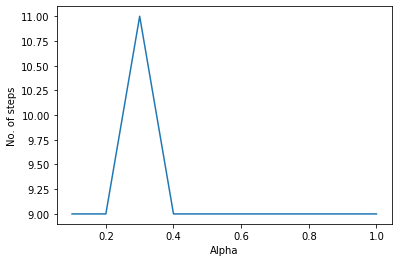

In [50]:
plt.plot(alpha[1:],steps1[1:])
plt.xlabel("Alpha")
plt.ylabel("No. of steps")

In [51]:
epsilon=[]
steps1=[]
for i in range(11):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                       gamma=0.99, 
                                       alpha=0.1, 
                                       epsilon=0.1*i, 
                                       maxiter=100, 
                                       maxstep=1000)
    test_start = [0,2]
    test_trace,steps = agent.test(test_start)
    epsilon.append(round((0.1*i),1))
    steps1.append(steps)
    print("Epsilon: ",round((0.1*i),1),"\tNo. of Steps: ",str(steps))

Epsilon:  0.0 	No. of Steps:  [9]
Epsilon:  0.1 	No. of Steps:  [9]
Epsilon:  0.2 	No. of Steps:  [11]
Epsilon:  0.3 	No. of Steps:  [13]
Epsilon:  0.4 	No. of Steps:  [12]
Epsilon:  0.5 	No. of Steps:  [15]
Epsilon:  0.6 	No. of Steps:  [19]
Epsilon:  0.7 	No. of Steps:  [15]
Epsilon:  0.8 	No. of Steps:  [36]
Epsilon:  0.9 	No. of Steps:  [75]
Epsilon:  1.0 	No. of Steps:  [124]


Text(0, 0.5, 'No. of steps')

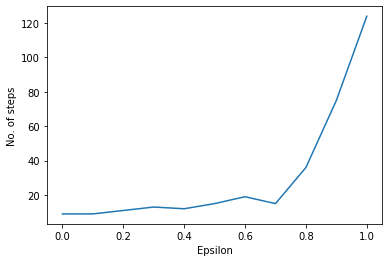

In [52]:
plt.plot(epsilon[0:],steps1[0:])
plt.xlabel("Epsilon")
plt.ylabel("No. of steps")

In [53]:

Gamma=[]
steps1=[]
for i in range(11):
    agent = RLAgent(env)
    start = [0,0]
    rtrace, steps, trace = agent.train(start, 
                                       gamma=0.9+(0.01*i), 
                                       alpha=0.1, 
                                       epsilon=0.1, 
                                       maxiter=100, 
                                       maxstep=1000)
    test_start = [0,2]
    test_trace,steps = agent.test(test_start)
    Gamma.append(round((0.9+(0.01*i)),2))
    steps1.append(steps)
    print("Gamma: ",round((0.9+(0.01*i)),2),"\tNo. of Steps: ",str(steps))

Gamma:  0.9 	No. of Steps:  [9]
Gamma:  0.91 	No. of Steps:  [61]
Gamma:  0.92 	No. of Steps:  [9]
Gamma:  0.93 	No. of Steps:  [12]
Gamma:  0.94 	No. of Steps:  [15]
Gamma:  0.95 	No. of Steps:  [12]
Gamma:  0.96 	No. of Steps:  [9]
Gamma:  0.97 	No. of Steps:  [9]
Gamma:  0.98 	No. of Steps:  [9]
Gamma:  0.99 	No. of Steps:  [11]
Gamma:  1.0 	No. of Steps:  [9]


Text(0, 0.5, 'No. of steps')

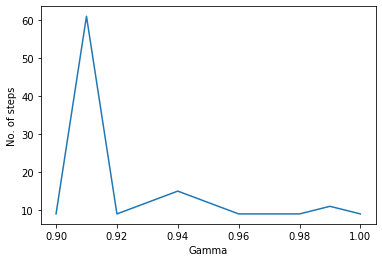

In [54]:
plt.plot(Gamma[0:],steps1[0:])
plt.xlabel("Gamma")
plt.ylabel("No. of steps")

### Report of Selected Parameters for Maze

From the above results and plots we can see that with alpha value of 0.5, epsilon value of 0.1, gamma value of 0.91 agent is taking minimum number of steps. I will be using these three optimal parameters together for the final training:

gamma=0.91<br>
alpha=0.5<br>
epsilon=0.1

In [55]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.99, 
                                   alpha=0.1, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

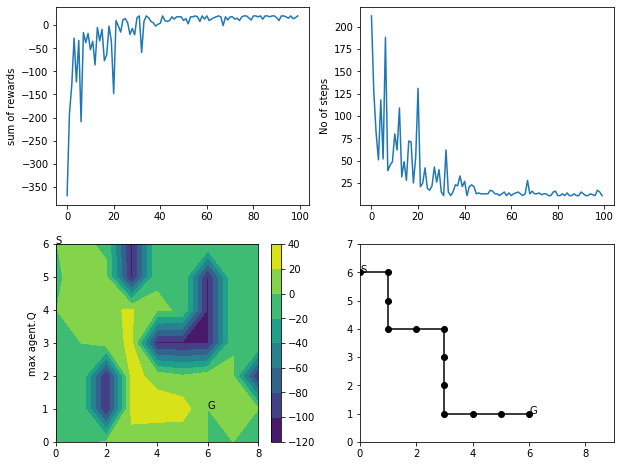

In [56]:
plot_train(agent, rtrace, steps, trace, start)

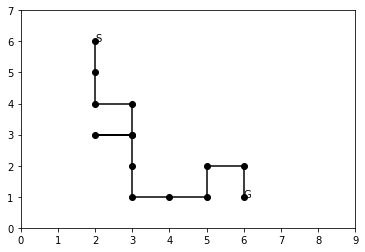

In [57]:
test_start = [0,2]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)

[78]

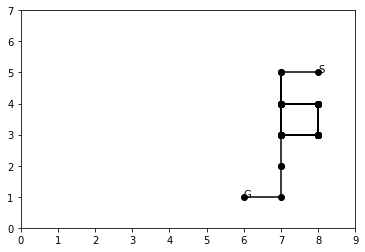

In [58]:
test_start = [1,8]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
steps

### Considering the best parameters for final training 

In [59]:
agent = RLAgent(env)
start = [0,0]
rtrace, steps, trace = agent.train(start, 
                                   gamma=0.91, 
                                   alpha=0.5, 
                                   epsilon=0.1, 
                                   maxiter=100, 
                                   maxstep=1000)

### Plots for maze

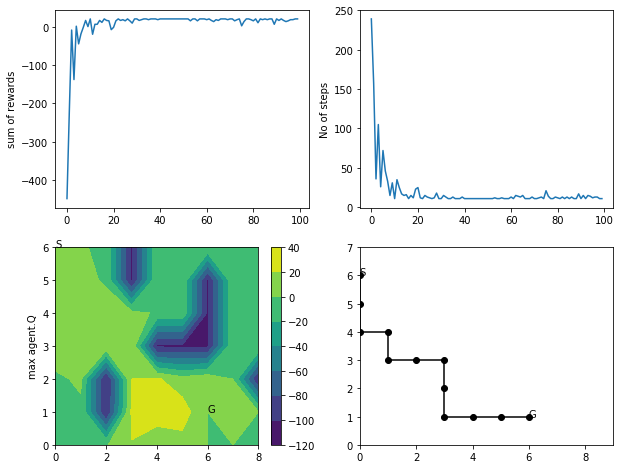

In [60]:
plot_train(agent, rtrace, steps, trace, start)

[12]

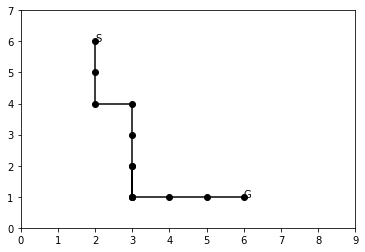

In [61]:
test_start = [0,2]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
steps

[1000]

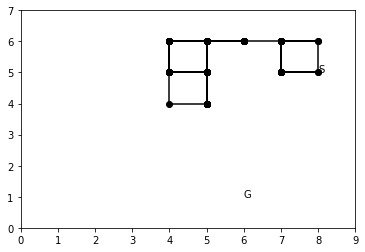

In [62]:
test_start = [1,8]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
steps

[11]

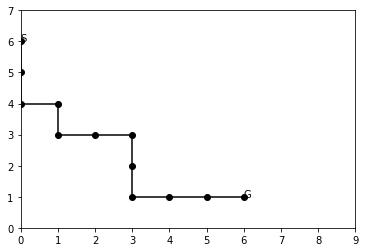

In [63]:
test_start = [0,0]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
steps

[6]

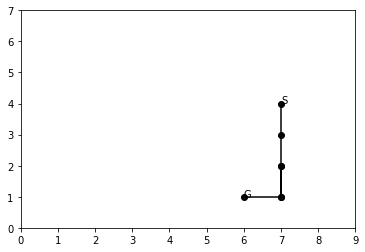

In [64]:
test_start = [2,7]
test_trace,steps = agent.test(test_start)
plot_trace(agent, test_start, test_trace)
steps

### Reading and analysis of learning results and plots

The agent sometimes does not reach the goal where as sometimes it does even if number of steps are more. Some regions are explored while some are not. Results are different with different starting points.

# V. Conclusions

RL Agent cannot be judged based on win rate or number of rounds it survived, for one game only. Since the number of rounds and win rate for different game is different, we cannot judge it for one game. But if we try 2 or 3 games then we can observed a good judging criteria for the RL Agent. In this assignment, I have learned how to train a Reinforcement Learning agent. In this assignment, I have faced many issues with the Q table i.e with states and actions. I had to read a lot about reinforcement learning online. I was able to understand the difference between Q-learning and SARSA.

# Extra Credit for Tournament Top16!

- In two classes, we will have qualification and tournament.
- To participate the tournament, you need to use this [client](http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/StudentClient.ipynb) codes.
- Locally you can run the [server](http://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/SERVER.ipynb) to verify your run. 

### Qualification Round 

- In qualification game, individual will play against a fixed policy agent on the server
  - You can access the server: TBA
  
  - Highly ranked (by the profit) will proceed to the tournament.
  - max. 32 players will be cut for main tournament (by 11 pm on Dec 1st).
  
### Tournament

- In tournament, 4 players will be play in each round.
  - In a table game, two best scoring players will proceed to next round
  - In final, the game will ends in 50 rounds and winner will be the one with lowest balance. 

## Grading

We will test your notebook with an additional grid.txt file. Please make sure to test in different maze input files. 

points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
35 | Methods | 
 |10| Review of the SARSA and Q-Learning
 | 5| Choice of TD learning and Reason
 | 5| Choice of Function Approximation and Reason
 |10| Implementation of the selected approach (RLAgent)
 | 5| explanation of the codes
45 | Results 
 |10| Reports the selected parameters 
 |15| Experimental outputs that show the choice of parameters. How do you choose them?
 |10| Output plots (5 for each)
 |10| reading and analysis of learning results and plots
10 | Participation to the tournament.
5 | Conclusions 
